# Тестим датасет TripAdvisor by Alexandra Roshchina 2015
лежит у меня в зипке

In [17]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('reviews_32618_for_1098_users_with_location.xlsx')
df.head()

,id,username,type,date,title,text,rating,helpfulness,total_points,taObject,taObjectUrl,taObjectCity
0,1,007solotraveler,Hotels,2013-04-08,Good Choice and would be suitable for a family,Decent Hotel next to station so good location ...,4,1.0,101,"Radisson Blu Royal Viking Hotel, Stockholm",http://www.tripadvisor.com/Hotel_Review-g18985...,Stockholm
1,2,007solotraveler,Hotels,2013-04-08,Modern and Chic - suitable both family and bus...,Excellent Hotel - well situated for getting ro...,5,0.0,100,Radisson Blu Waterfront Hotel,http://www.tripadvisor.com/Hotel_Review-g18985...,Stockholm
2,3,007solotraveler,Attractions,2013-02-20,Brilliant - Well worth a visit(s),Great Museum - abslutely worth making the time...,5,1.0,101,Vasa Museum,http://www.tripadvisor.com/Attraction_Review-g...,Stockholm
3,4,007solotraveler,Hotels,2012-07-09,Family stay,Stayed for 3 nights in MIami - stayed here due...,4,0.0,100,Hilton Miami Airport,http://www.tripadvisor.com/Hotel_Review-g34438...,Miami
4,5,007solotraveler,Restaurants,2011-09-07,Great Prime Rib!,I always visit Hunters when in San Diego. The ...,5,1.0,101,Hunter Steakhouse,http://www.tripadvisor.com/Restaurant_Review-g...,San Diego


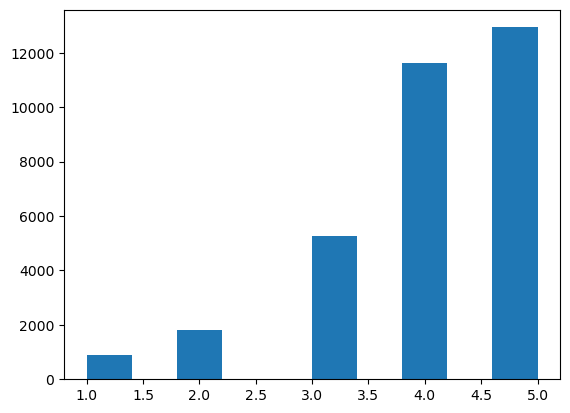

In [3]:
plt.hist(df.rating);

In [4]:
Counter(df.rating)

Counter({4: 11632, 5: 12937, 1: 908, 3: 5274, 2: 1829})

In [5]:
df.shape

(32580, 12)

In [8]:
df.columns

Index(['id', 'username', 'type', 'date', 'title', 'text', 'rating',
       'helpfulness', 'total_points', 'taObject', 'taObjectUrl',
       'taObjectCity'],
      dtype='object')

In [9]:
df.describe()

,id,rating,helpfulness,total_points
count,32580.000000,32580.000000,24105.000000,32580.000000
mean,16307.956937,4.039319,1.131923,142.337508
std,9417.122042,1.016283,2.116548,2004.348363
min,1.000000,1.000000,0.000000,100.000000
25%,8151.750000,4.000000,0.000000,100.000000
50%,16308.500000,4.000000,1.000000,100.000000
75%,24462.250000,5.000000,1.000000,101.000000
max,32620.000000,5.000000,86.000000,102100.000000


# Тестим датасет Yelp
https://www.kaggle.com/datasets/ilhamfp31/yelp-review-dataset?resource=download

In [5]:
df_yelp = pd.read_csv('train.csv', header=None, names=['score', 'review'])

In [6]:
df_yelp.head(5)

,score,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


array([[<Axes: title={'center': 'score'}>]], dtype=object)

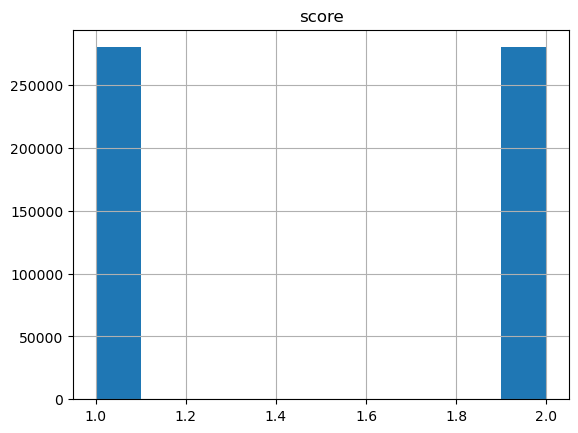

In [7]:
df_yelp.hist()

In [168]:
df_yelp.shape

(560000, 2)

### Датасеты с крутого сайта - https://huggingface.co/datasets/Tatyana/ru_sentiment_dataset
https://huggingface.co/datasets/Tatyana/ru_sentiment_dataset/tree/main

In [16]:
data_ru = pd.read_csv('datasets.csv')

In [17]:
data_ru.head()

,Unnamed: 0,text,sentiment
0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1
1,17755,Отель выбрали потому что рядом со стадионом. О...,0
2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1
3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0
4,27879,"Отличное месторасположение,прекрасный вид,особ...",1


In [179]:
data_ru['text'].iloc[14]

'Отдыхали с мамой с 1.01.2018 по 6.01.2018. Очень чистые номера, безупречная работа клининговой службы. Приветливый персонал, всегда готовы помочь и ответить на вопросы. Очень качественные продукты на завтраках, домашняя свежайшая выпечка - настоящий турецкий завтрак. Весь отель пропитан атмосферой Турции, в лобби маленький музей. У отель богатая история, которую можно узнать по фотографиям. Потрясающий вид с террасы ресторана, одна часть на море, а другая на Султан Ахмет и Софию. В пешей доступности весь исторический центр. Был выбор между Хилтоном и этим отелем. Не пожалели. Когда решим еще раз поехать в Стамбул, обязательно остановимся в этом отеле.'

In [28]:
!pip install selenium

     ---------------------------------------- 6.5/6.5 MB 10.7 MB/s eta 0:00:00
     ------------------------------------- 384.9/384.9 kB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00


In [49]:
!pip install parsel

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep

driver = webdriver.Edge()

url = 'https://yandex.ru/maps/org/yandeks/1124715036/reviews/'
driver.get(url)

# загрузка страницы
sleep(5)
reviews_web = driver.find_elements(By.XPATH,'//div[@class="business-review-view__body"]')

# хранение рейтингов
ratings = []
reviews = []

ratings_web = driver.find_elements(By.XPATH,'.//div[contains(@class, "business-review-view__rating")]//meta[contains(@itemprop, "ratingValue")]')

for rating, review in zip(ratings_web, reviews_web):
    ratings.append(rating.get_attribute("content"))
    reviews.append(review.text)

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep

links = pd.read_csv('links.csv')

ratings = []
reviews = []

driver = webdriver.Edge()

for link in links['link'].to_list():
    url = link
    driver.get(url)
    sleep(5)
    reviews_web = driver.find_elements(By.XPATH,'//div[@class="business-review-view__body"]')
    
    ratings_web = driver.find_elements(By.XPATH,'.//div[contains(@class, "business-review-view__rating")]//meta[contains(@itemprop, "ratingValue")]')

    for rating, review in zip(ratings_web, reviews_web):
        ratings.append(rating.get_attribute("content"))
        reviews.append(review.text)

In [22]:
len(ratings)

2670

In [23]:
len(reviews)

2670

<Axes: >

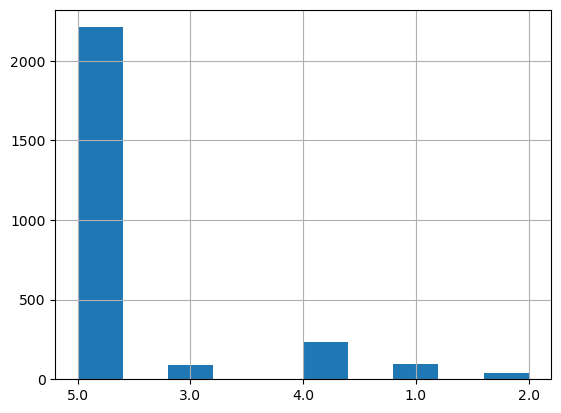

In [26]:
attractions_reviews['rating'].hist()

In [24]:
attractions_reviews = pd.DataFrame()
attractions_reviews['review'] = reviews
attractions_reviews['rating'] = ratings
attractions_reviews

,review,rating
0,"Одно из самых прекрасных, красивейших и обязат...",5.0
1,Была 5 января на спектакле Кремлёвского балета...,3.0
2,"Все отлично и замечательно , ходила на «Щелкун...",5.0
3,Великолепное атмосферное место в самом сердце ...,5.0
4,ГУМ Ярмарка - это традиционное и ежегодное мер...,5.0
...,...,...
2665,Самый большой заповедник в черте города! Необы...,5.0
2666,"Довольно большой парк, таинственный и просто с...",5.0
2667,"Огромный, просто огромнейшая территория. Насто...",5.0
2668,"Были в Парке вчера, все здорово, экскурсии на ...",3.0


In [25]:
attractions_reviews.to_csv('attractions_reviews.csv')

In [18]:
links = pd.read_csv('links.csv')

In [19]:
links

,link
0,https://yandex.ru/maps/org/moskovskiy_kreml/10...
1,https://yandex.ru/maps/org/gosudarstvennaya_tr...
2,https://yandex.ru/maps/org/pyotr_i_pamyatnik_3...
3,https://yandex.ru/maps/org/ges_2/216491468916/...
4,https://yandex.ru/maps/org/muzeon/173589962820...
...,...
57,https://yandex.ru/maps/org/moskovskiy_tsirk_ni...
58,https://yandex.ru/maps/org/tsentralny_park_kul...
59,https://yandex.ru/maps/org/neskuchny_sad/15637...
60,https://yandex.ru/maps/org/botanicheskiy_sad_m...


In [131]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

# Запуск браузера
driver = webdriver.Edge()

# Открытие страницы с отзывами
url = 'https://yandex.ru/maps/org/yandeks/1124715036/reviews/'
driver.get(url)

# Ожидание загрузки страницы
sleep(5)

# # Прокрутка страницы до конца
# body = driver.find_elements(By.CSS_SELECTOR,'body')
# body[0].send_keys(Keys.END)

# Извлечение текста отзывов
# reviews = driver.find_elements(By.CSS_SELECTOR,'.business-review-view__body-text')
reviews = driver.find_elements(By.CSS_SELECTOR,'.business-review-view__body-text')


ratings = driver.find_elements(By.CSS_SELECTOR,'.business-review-view__rating')


for review in reviews:
    #print(review.find_element(By.CSS_SELECTOR,'meta[itemprop="ratingValue"]'))
    print(review.text, '\n')

print('Рейтинг:', ratings[0].text)
# Закрытие браузера
# driver.quit()


Довольно часто пользуюсь многими сервисами компании, все информативно, удобно, хорошо работает если у вас современные устройства. Большое количество реально нужных сервисов. Логически правильно продуманные меню программ. Но! в обновлённом браузере яндекс по новому дзен, в компьютерной версии, скрыто подменю с популярными сервисами: картинки, карты, видео, т.д., они появляются только после ввода текста, как всплывающее меню, мне лично это не совсем удобно, а кто то вообще и не видит, где эти сервисы. Открывая страницу яндекса на компьюторе пользователю нужен уже какой то сервис, а его сразу и не найдешь. В старой версии этот момент был реализован лучше, на мой взгляд. Программы для мобильных устройств все хорошо, пользуюсь постоянно. Компания явный лидер по IT технологиям на Российском рынке. 

Довольно часто пользуюсь многими сервисами компании, все информативно, удобно, хорошо работает если у вас современные устройства. Большое количество реально нужных сервисов. Логически правильно п

Как пользователь иду под руку с Яндексом со времен поисковика, так что был рад расширению услуг. Являюсь постоянным пользователем большинства приложений компании, лучше Яндекса подобные сервисы в нашей стране никто не смог реализовать. Само собой, за долгие года бывали и неприятности, но специалисты службы поддержки клиентов всегда разбирались с проблемами и предлагали взаимовыгодные решения.
В сети много хейтеров, говорят что Яндекс уже не тот. Однако вы лучшие! Я рад пользоваться услугами компании. 

Прекрасный небольшой музей в котором есть много интересного, из того, что не представлено во втором большом музее Яндекса. Обязательно рекомендую сходить и предварительно записаться на бесплатную экскурсию. 

Если бы не Кинопоиск и Маркет, ушёл бы на любой другой сервис, лишь бы не связываться с этим. Поддержки хуже сотрудников Яндекс.Плюс в жизни не встречал. Ни одного внятного ответа, агрессивные сотрудники, которые повышают голос, смеются над твоей проблемой и отвечают по методичке. Р

Заказала матрас.Предоплата 100%.Интервал с 9.00 до 18.00.
Когда поинтересовалась у сотрудника службы поддержки что с доставкой получила ответ "вопросом на вопрос":а какой у вас браузер?И т.д.Поняла не сразу,что меня пытаются вежливо послать отслеживать заказ самостоятельно онлайн 
Для особо одаренных:
У людей может не быть интернета/мобильного/стационарного компьютера.
Ваше "отслеживание "курьера не работает.
 Вторая сотрудница просто перезвонила курьеру и сообщила мне радостную новость,что доставка будет около 19.30Но перезвонила,то есть выполнила свою работу легко и просто.
А сразу сообщить об этом нельзя??Люди должны сидеть и ждать весь день?
 Сейчас пытаюсь привязать карту к сервису такси-сплошные отписки и одно и то же в течении суток.Проблема не решается.
Это наглость монополистов?Или просто служба поддержки работает в алгоритме отписок,а не решения проблем.
Скриншот переписки сделать невозможно.
Дно. 

Место силы) Внутри немного тесновато, но довольно уютно. Офис старый (относит

In [132]:
ratings[0].text

''